In [6]:
#loading the data set
import pandas as pd
data = pd.read_csv('Output.csv')
data

,name,pts,ast,reb,blk,stl,sal,age,mp,fga
0,Precious Achiuwa,7.6,1.3,6.6,0.9,0.6,4379527.0,24,21.9,6.3
1,Bam Adebayo,19.3,3.9,10.4,0.9,1.1,32600060.0,26,34.0,14.3
2,Ochai Agbaji,5.8,1.1,2.8,0.6,0.6,4114200.0,23,21.0,5.6
3,Santi Aldama,10.7,2.3,5.8,0.9,0.7,2194200.0,23,26.5,9.3
4,Nickeil Alexander-Walker,8.0,2.5,2.0,0.5,0.8,4687500.0,25,23.4,6.6
...,...,...,...,...,...,...,...,...,...,...
521,Thaddeus Young,4.2,1.7,3.1,0.2,0.7,8638413.0,35,13.3,3.3
522,Trae Young,25.7,10.8,2.8,0.2,1.3,40064220.0,25,36.0,18.7
523,Omer Yurtseven,4.6,0.6,4.3,0.4,0.2,2800000.0,25,11.4,3.8
524,Cody Zeller,1.8,0.9,2.6,0.1,0.2,2019706.0,31,7.4,1.4


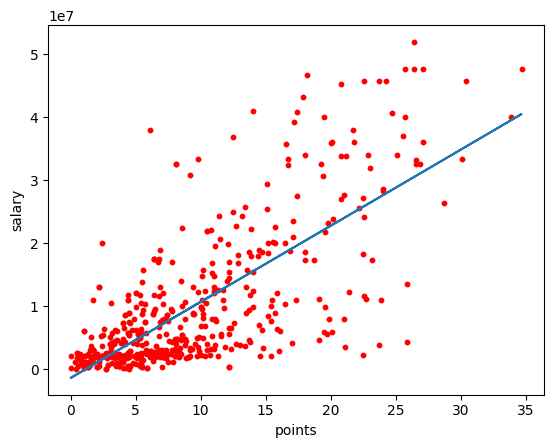

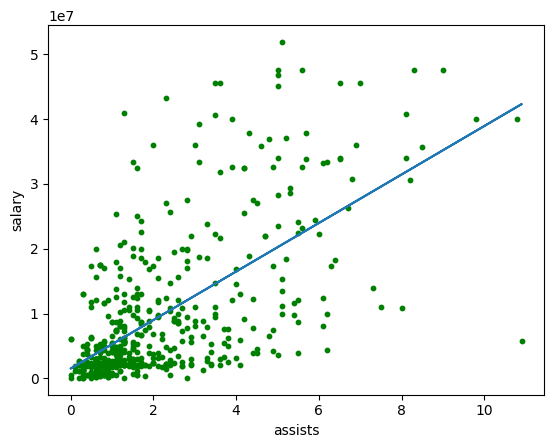

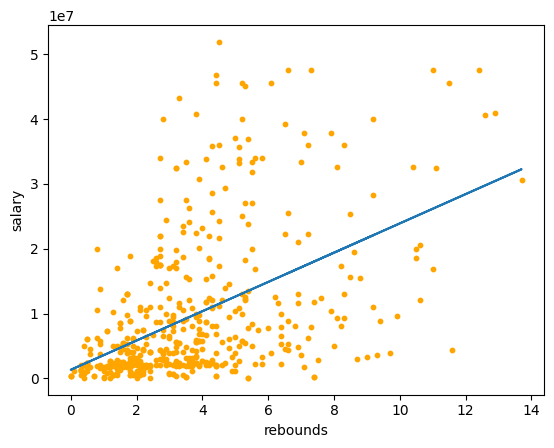

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Descriptive data analysis
#Plots relationship between a stat and salary to identify an potential relationships
#In general, it looks like points has the most linear relationship where more points would indicate a higher salary
#The y axis is in 10s of million
def plotSalaryPerStat(x, y, point_color, x_label, y_label, s): 
    
    plt.scatter(x, y, color = point_color, s = s)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m *x + b)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


plotSalaryPerStat(data['pts'], data['sal'], 'red', 'points', 'salary', 10)
plotSalaryPerStat(data['ast'], data['sal'], 'green', 'assists', 'salary', 10)
plotSalaryPerStat(data['reb'], data['sal'], 'orange', 'rebounds', 'salary', 10)





In [9]:
#Training model with data set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def trainModel(x,y,test_data_ratio, random_variation): 
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_data_ratio, random_state = random_variation)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, Y_train)
    print("The accuracy of the model is ",(linear_regression.score(X_train, Y_train)) * 100, "%")


X=data.drop(columns=["name", "sal"]) #dropping sal because that is the dependent veriable we are trying to predict
Y= data['sal']

trainModel(X,Y,0.35, 3384)

#Note that age makes a significant impact of the model. This could be because players make a lot less on their rookie deals even though
#they might be putting up great stats
X= data.drop(columns=["name", "sal", "age"]) 
trainModel(X,Y,0.35, 3384)


X= data.drop(columns=["name", "sal", "reb"]) 
trainModel(X,Y,0.35, 3384)


X= data.drop(columns=["name", "sal", "pts"]) 
trainModel(X,Y,0.35, 3384)

X= data.drop(columns=["name", "sal", "ast"]) 
trainModel(X,Y,0.35, 3384)

The accuracy of the model is  70.0635332848436 %
The accuracy of the model is  63.16246947905108 %
The accuracy of the model is  70.06174682877979 %
The accuracy of the model is  68.91557116225636 %
The accuracy of the model is  69.20452346787567 %


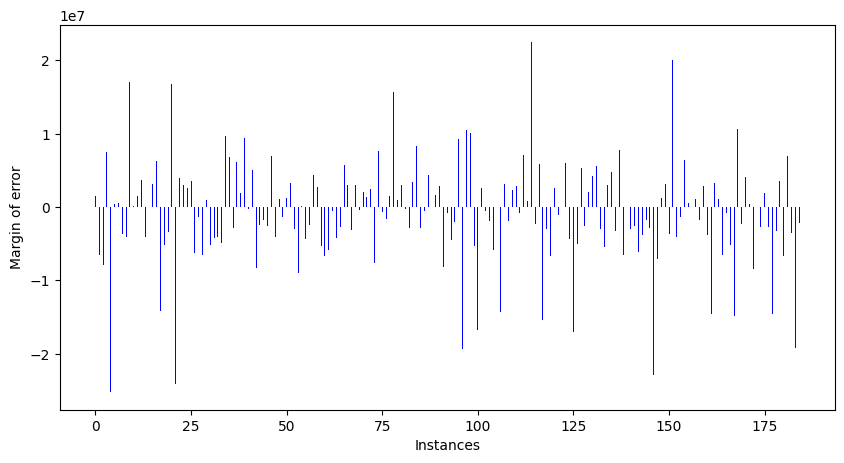

In [10]:
#Calculating and Plotting margin of error

X=data.drop(columns=["name", "sal"])
Y= data['sal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state = 3384)

linear_regression = LinearRegression()


linear_regression.fit(X_train, Y_train)

Y_pred = linear_regression.predict(X_test)


performance = pd.DataFrame({'Prediction': Y_pred,'Actual Value':  Y_test})
performance['error'] = performance['Actual Value'] - performance['Prediction']

performance.reset_index(drop=True, inplace = True)
performance.reset_index(inplace=True)


sampled_performance = {'index': [], 'Prediction': [], 'Actual Value': [], 'error': []}
sample_size = len(performance['index'])

for i in range(sample_size): 
    if i%5 == 0: #Only graphing 1/5 points for readability
        sampled_performance['index'].append(performance['index'][i])
        sampled_performance['Prediction'].append(performance['Prediction'][i])
        sampled_performance['Actual Value'].append(performance['Actual Value'][i])
        sampled_performance['error'].append(performance['error'][i])
        

fig = plt.figure(figsize=(10,5))

#Graphing margin of error 
plt.bar("index", "error", data = performance, color = 'blue', width = 0.25)
plt.xlabel("Instances")
plt.ylabel("Margin of error")

plt.show()


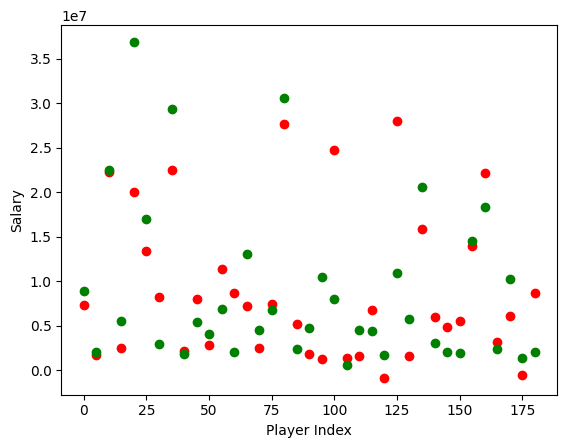

In [13]:

#Plotting prediction vs actual value

plt.scatter(sampled_performance['index'], sampled_performance['Prediction'], color = 'red') #Red points are the estimate
plt.scatter(sampled_performance['index'], sampled_performance['Actual Value'], color = 'green') #Green points are the actual salary
plt.xlabel('Player Index')
plt.ylabel('Salary')
plt.show()


In [15]:
#Least Squares Reqression

import statsmodels.api as sm

OLS = sm.OLS(Y_train, X_train).fit()

print(OLS.summary()) #Performing least squares regression is about 10% more accurate
print(OLS.params) #Prining out coefficients for model


                                 OLS Regression Results                                
Dep. Variable:                    sal   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              154.3
Date:                Fri, 31 May 2024   Prob (F-statistic):                   3.92e-107
Time:                        10:52:17   Log-Likelihood:                         -5849.9
No. Observations:                 341   AIC:                                  1.172e+04
Df Residuals:                     333   BIC:                                  1.175e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

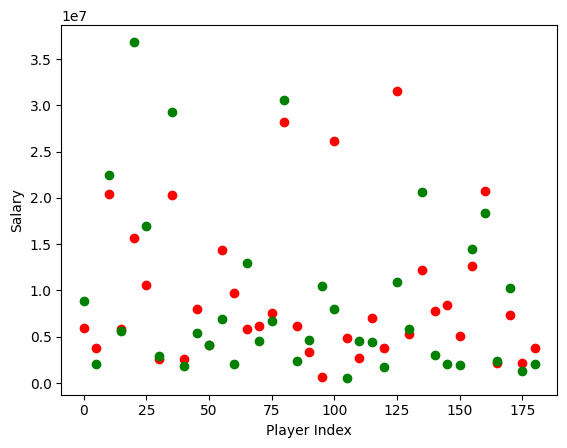

In [17]:

#Graphing Least Squares Regression Prediction

performance = pd.DataFrame({'Prediction': OLS.predict(X_test),'Actual Value':  Y_test})
performance['error'] = performance['Actual Value'] - performance['Prediction']

performance.reset_index(drop=True, inplace = True)
performance.reset_index(inplace=True)

sampled_performance = {'index': [], 'Prediction': [], 'Actual Value': [], 'error': []}
sample_size = len(performance['index'])

for i in range(sample_size): 
    if i%5 == 0: 
        sampled_performance['index'].append(performance['index'][i])
        sampled_performance['Prediction'].append(performance['Prediction'][i])
        sampled_performance['Actual Value'].append(performance['Actual Value'][i])
        sampled_performance['error'].append(performance['error'][i])
        
plt.scatter(sampled_performance['index'], sampled_performance['Prediction'], color = 'red') #Red points are the estimate
plt.scatter(sampled_performance['index'], sampled_performance['Actual Value'], color = 'green') #Green points are the actual salary
plt.xlabel('Player Index')
plt.ylabel('Salary')
plt.show()


In [18]:

def prediction(pts, ast, reb, blk, stl, age, mp, fga): 
    df = pd.DataFrame({'pts': [pts], 'ast': [ast], 'reb': [reb], 'blk': [blk], 'stl': [stl], 'age': [age],'mp': [mp], 'fga': [fga] })
    least_squares_prediction = OLS.predict(df)
    linear_regression_prediction = linear_regression.predict(df)
    salary = 0
    for key in least_squares_prediction: 
        salary = key
    print("An estimation for the salary of a player with these stats using ordinary least squares regression is: $", salary)
    for key in linear_regression_prediction: 
        salary = key
    print("An estimation for the salary of a player with these stats using linear regression is: $", salary)
    
prediction(33.9, 9.8, 9.2, 0.5, 1.4, 24, 37.5, 23.6) #Luka Doncic's stats; his salary for 2023-2024 was $40.06 million making him underpaid
prediction(17.2, 3.1, 6.5, 0.7, 1.0, 31, 33.8, 13.6) #Tobias Harris's stats; his salary for 2023-2024 was 37.63 million making him significantly overpaid


An estimation for the salary of a player with these stats using ordinary least squares regression is: $ 48141308.958555505
An estimation for the salary of a player with these stats using linear regression is: $ 43905679.81071641
An estimation for the salary of a player with these stats using ordinary least squares regression is: $ 18038638.237751335
An estimation for the salary of a player with these stats using linear regression is: $ 22246563.141857326
